In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Effet du poids global $W$

Ici, nous étudions l'effet du poids global $W$ sur la sélectivité à l'orientation du ring

Pour cela, Nous simulons le réseau pour chaque valeur de $W$ et nous affichons les rasterplots représentant l'activité des neurones des trois populations du modèle.

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


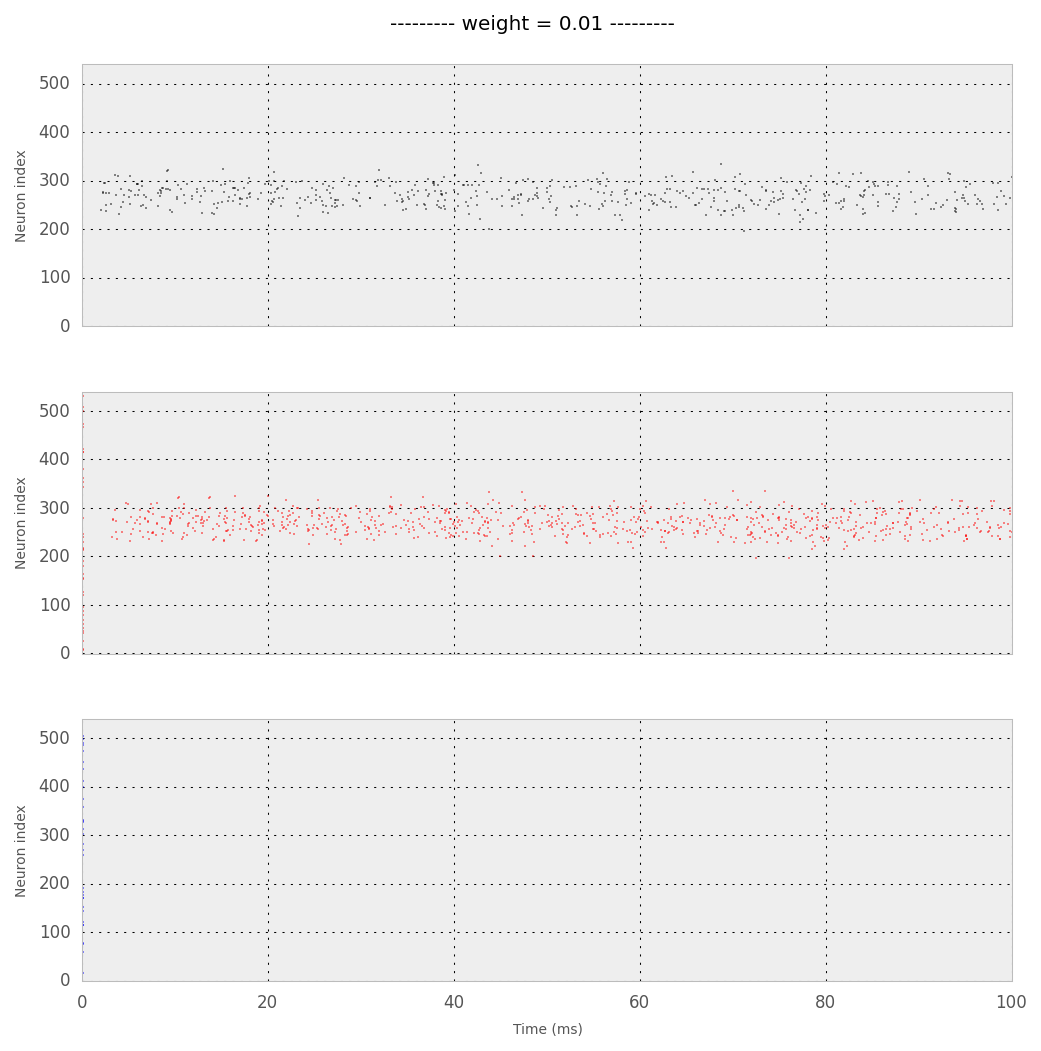

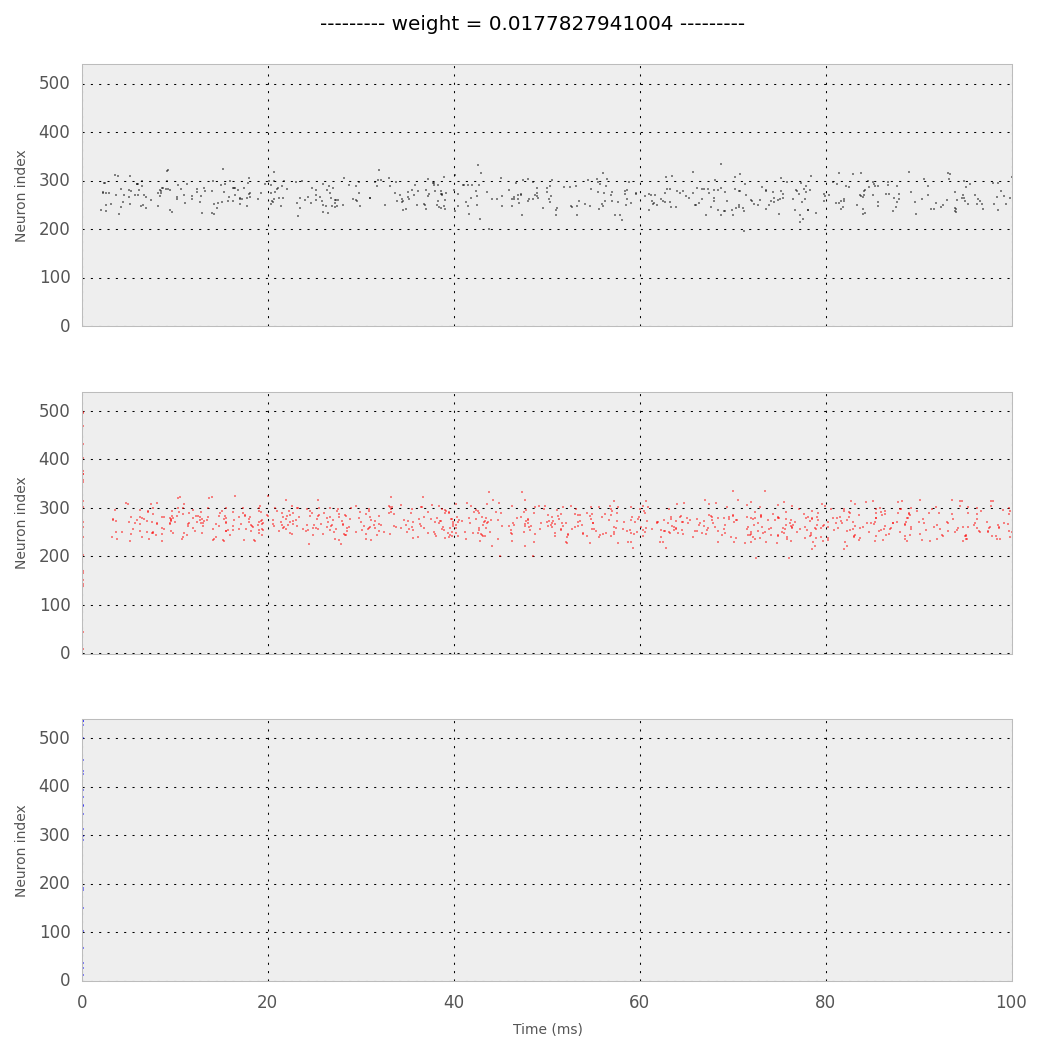

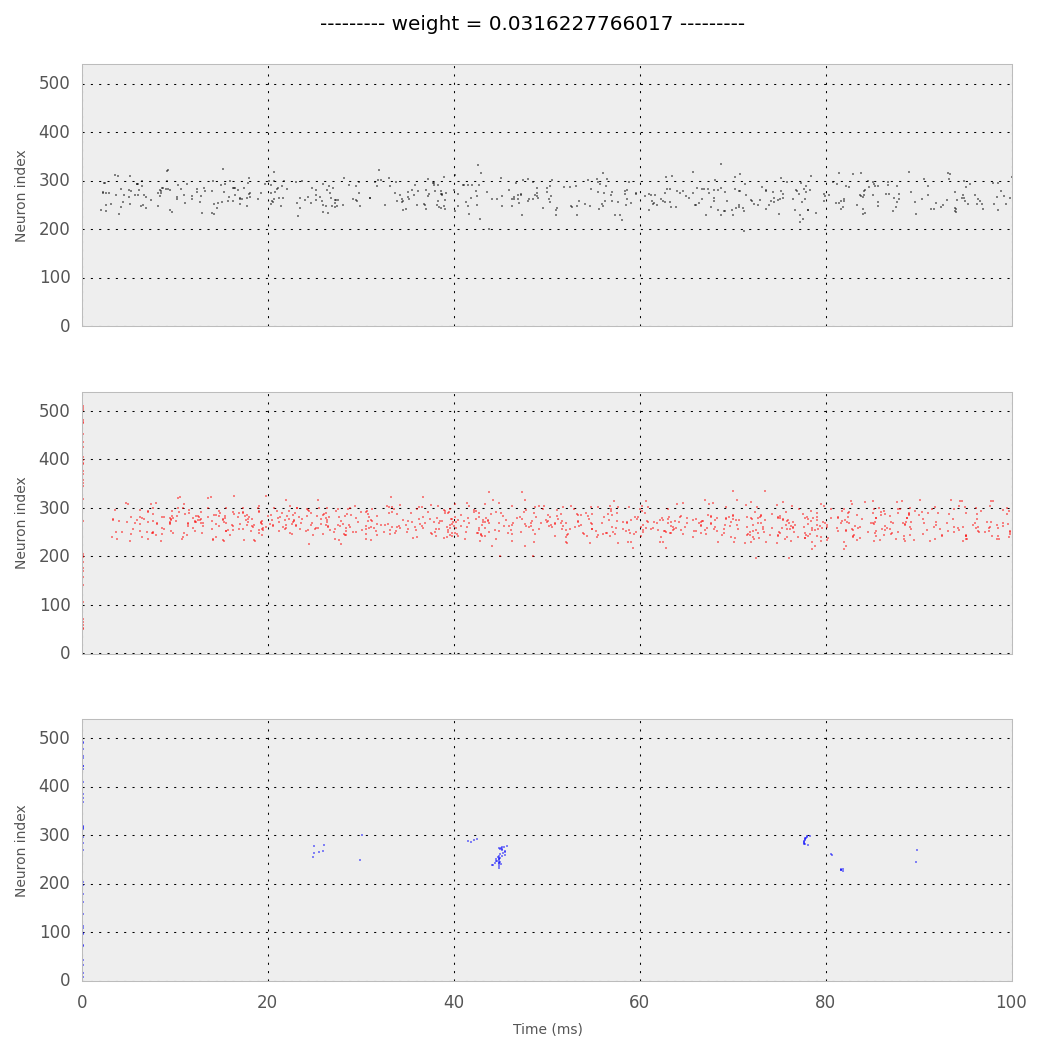

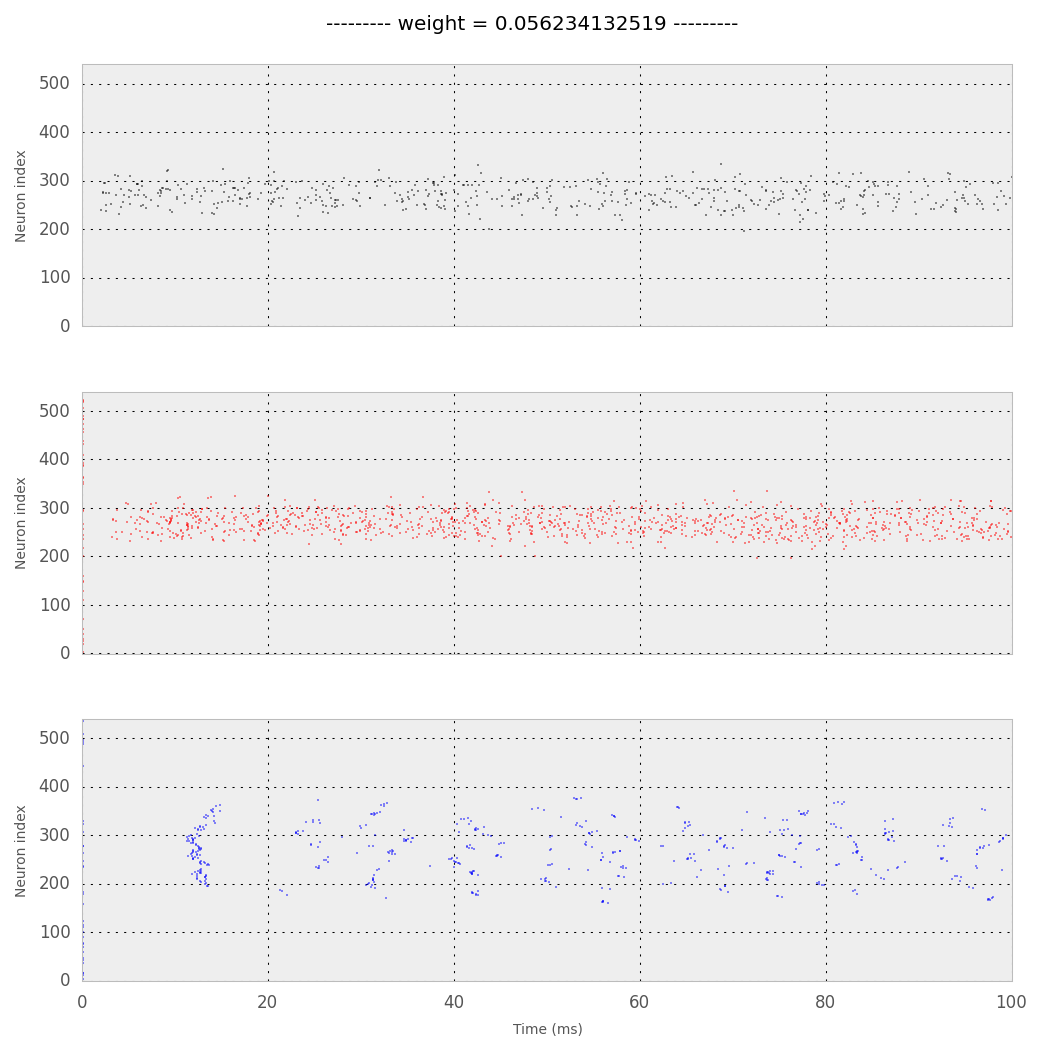

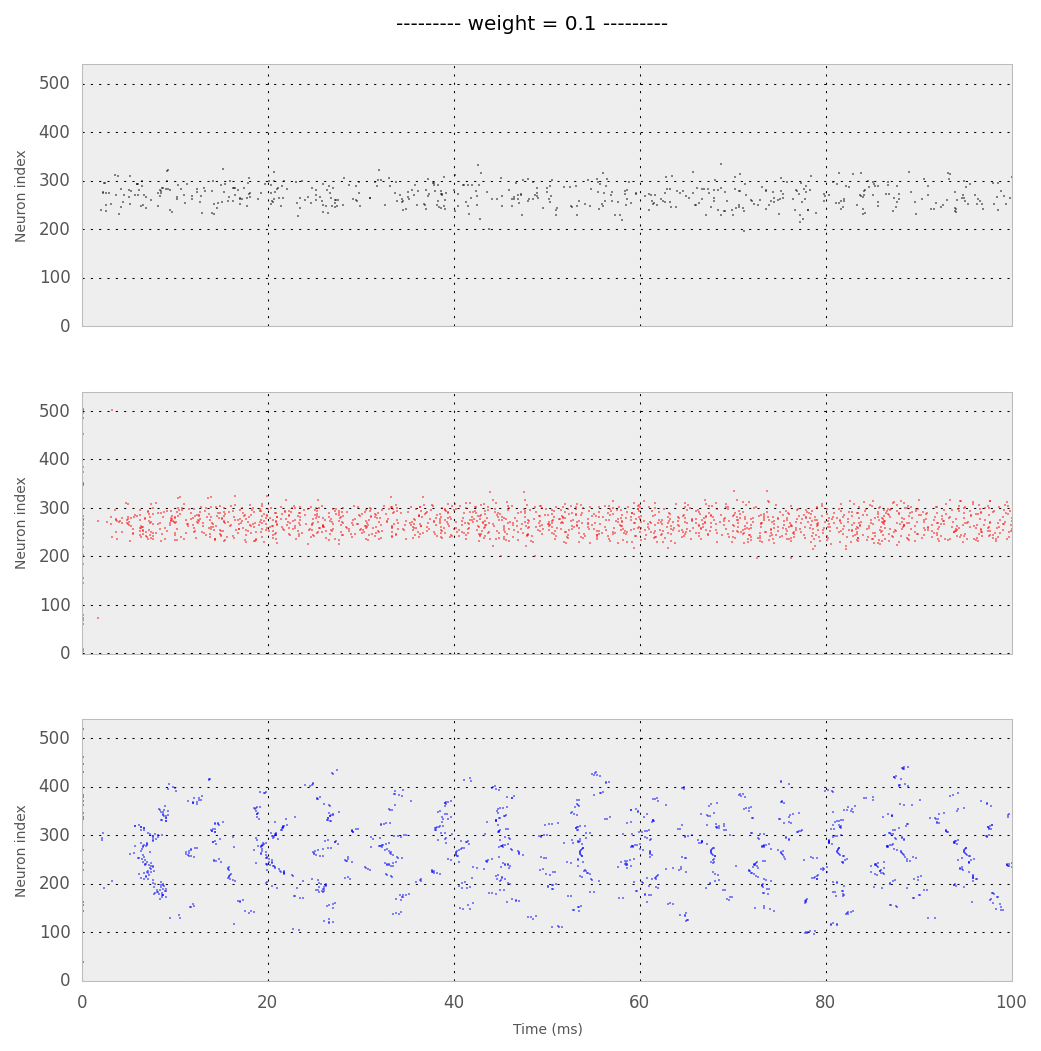

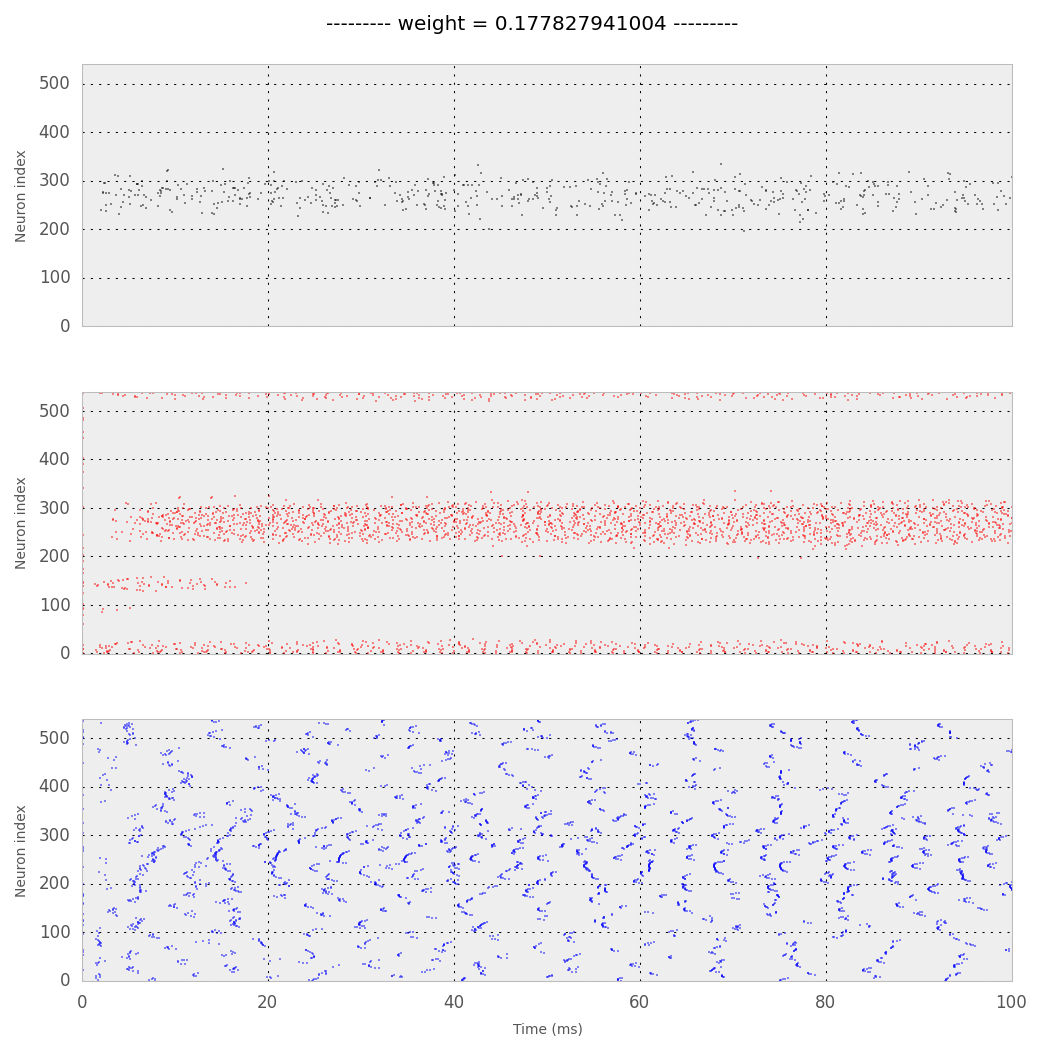

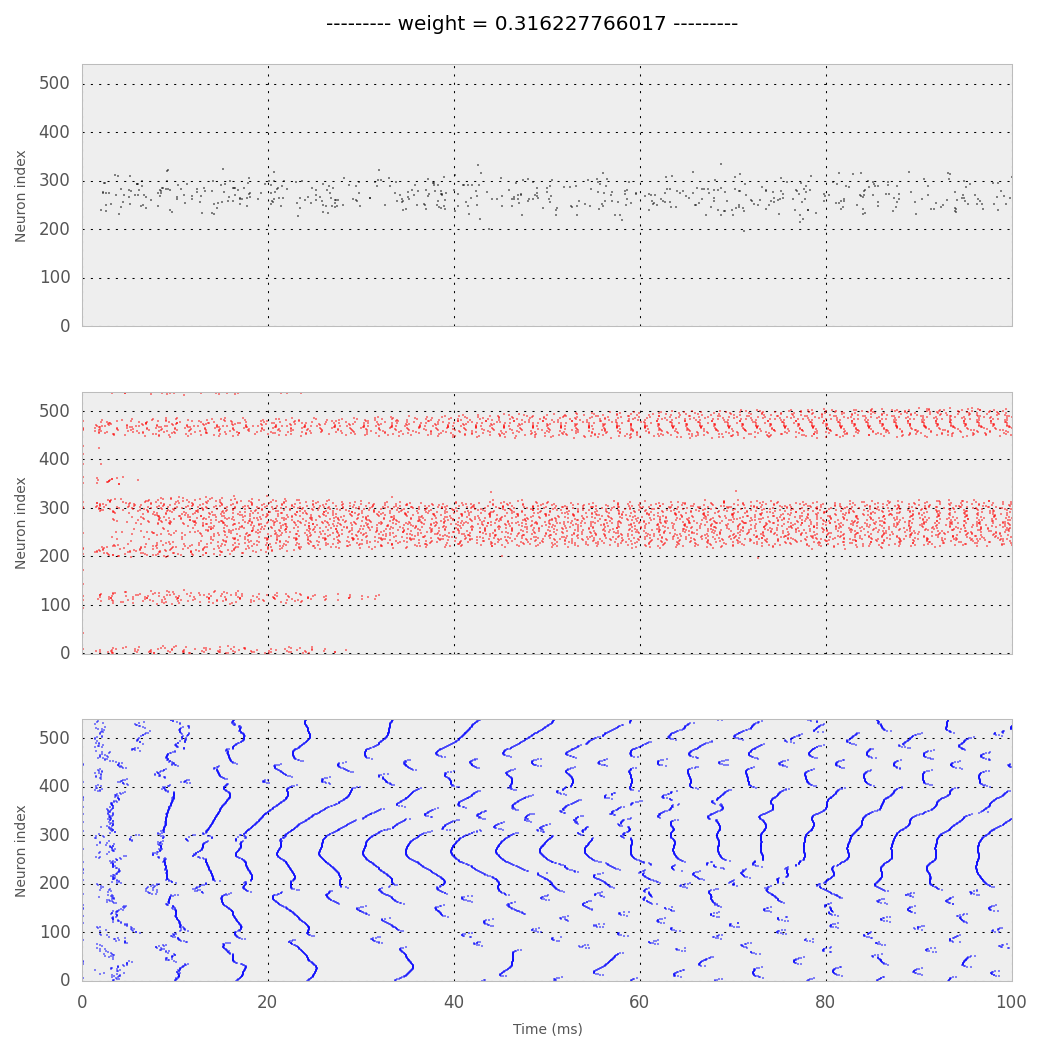

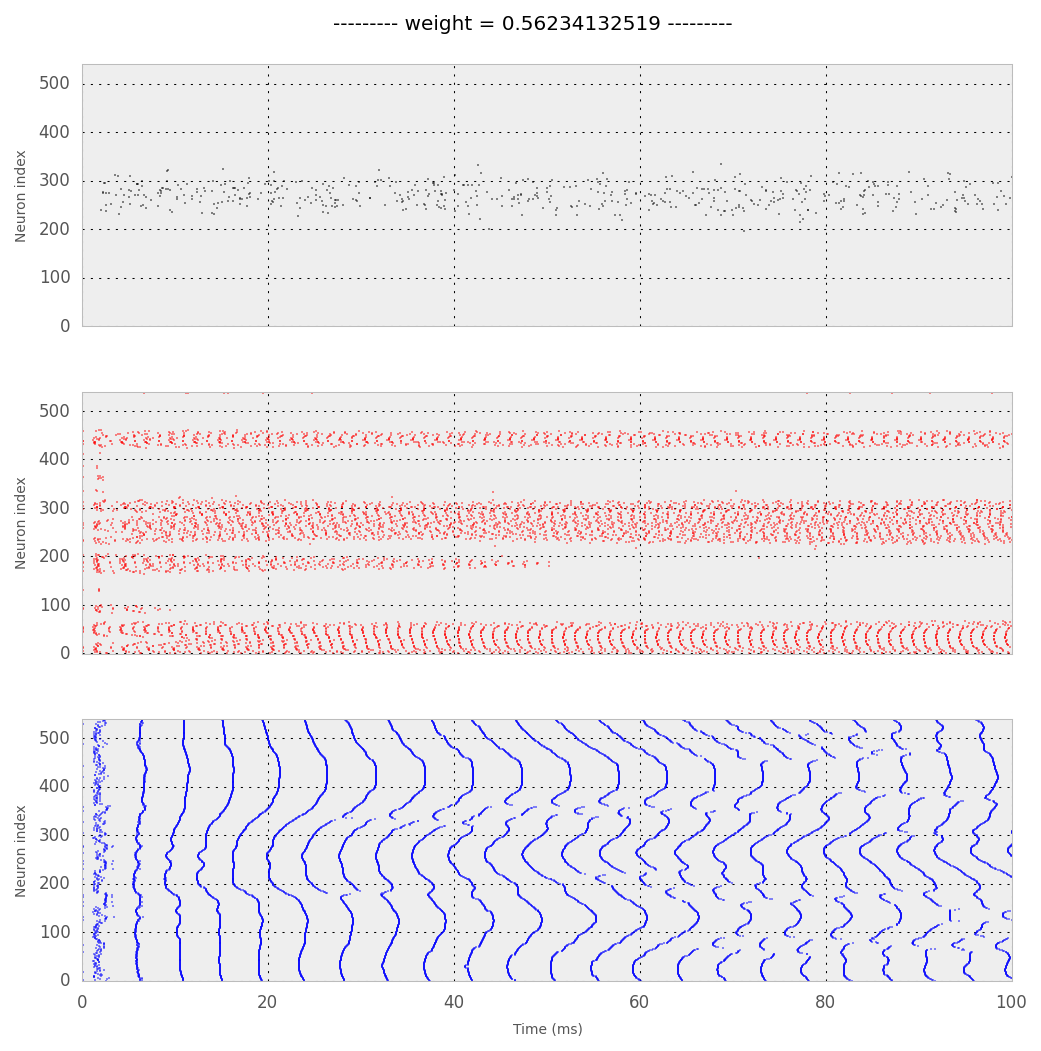

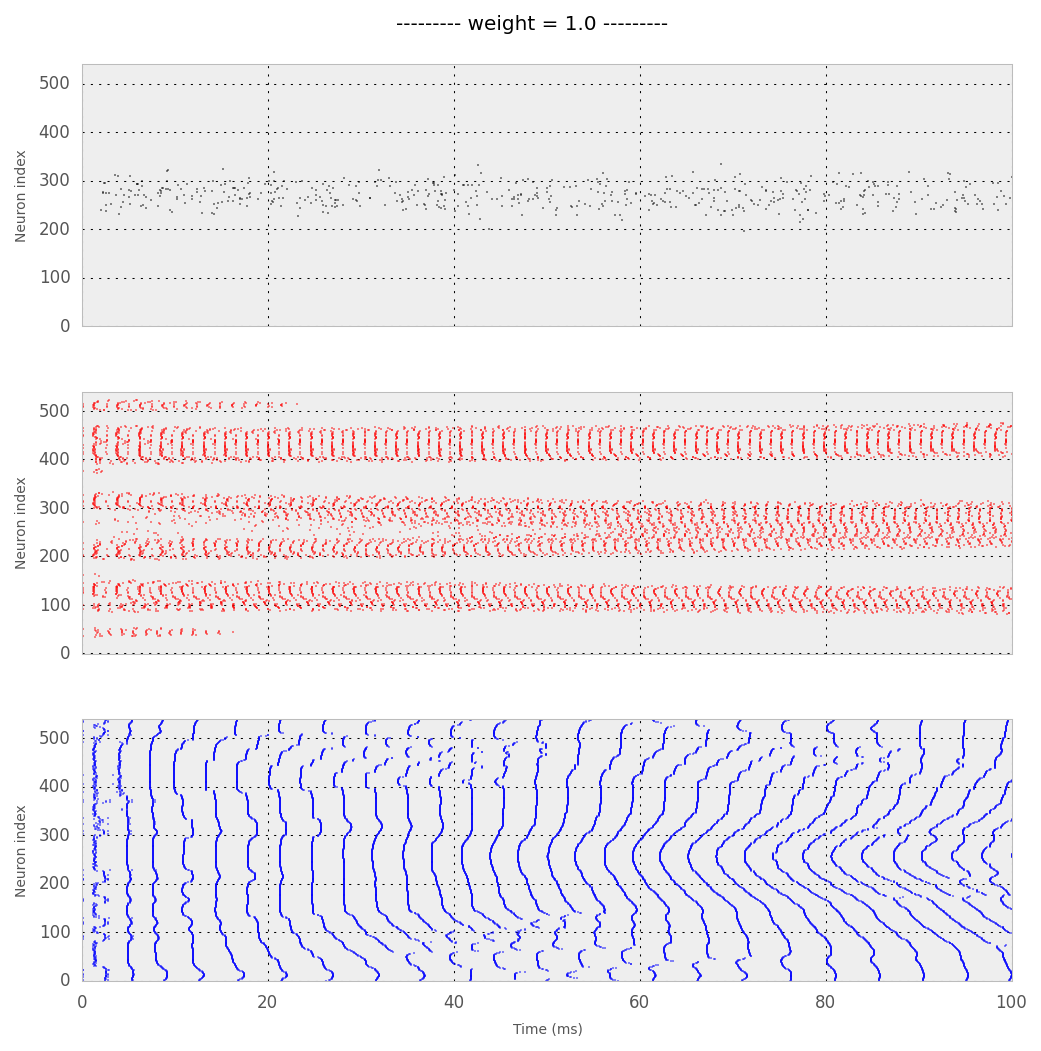

In [2]:
from RRNN import RRNN
from pyNN.utility.plotting import Figure, Panel
markersize = .5

time = 100
net = RRNN()

def rec_net(time=time, w=net.w, g=net.g, b_input=15, b_exc_inh=50, b_exc_exc=4, b_inh_exc=50, b_inh_inh=4):
    net = RRNN(time=time, w=w, g=g, c=1)
    net.sim_params['b_input'] = b_input
    net.sim_params['b_exc_inh'] = b_exc_inh
    net.sim_params['b_exc_exc'] = b_exc_exc
    net.sim_params['b_inh_exc'] = b_inh_exc
    net.sim_params['b_inh_inh'] = b_inh_inh
    return net

ws = net.w * np.logspace(-1, 1, 9)
for w in ws:
    fig, ax = plt.subplots(figsize=(8,8))
    net = rec_net(time=time, w=w)

    df, spikesE, spikesI = net.model()
    fig = Figure(Panel(net.spikesP.spiketrains, xticks=False, yticks=True, ylabel="input", color='k', markersize=markersize), #, line_properties=line_properties
            Panel(net.spikesE.spiketrains, xticks=False, yticks=True, ylabel="Excitatory", color='r', markersize=markersize),
            Panel(net.spikesI.spiketrains, xlabel="Time (ms)", xticks=True, yticks=True, color='b', ylabel="Inhibitory", markersize=markersize),
            title='--------- weight = {} ---------'.format(str(w)))

    plt.show()